# Import pustaka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membaca dataset

1. Name : Nama dari Pokemon
2. Type 1 : Tipe utama dari Pokemon. Setiap Pokemon memiliki setidaknya satu tipe yang menentukan kekuatan, kelemahan, dan serangan yang dapat digunakan.
3. Type 2 : Tipe kedua dari Pokemon. Beberapa Pokemon memiliki dua tipe yang memberikan kombinasi unik dari kekuatan dan kelemahan.
4. Total : Jumlah total dari semua statistik dasar Pokemon (HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed).
5. HP (Hit Points) : Jumlah poin kesehatan Pokemon.
6. Attack : Statistik yang menentukan kekuatan serangan fisik Pokemon.
7. Defense : Statistik yang menentukan pertahanan fisik Pokemon.
8. Sp. Atk (Special Attack) : Statistik yang menentukan kekuatan serangan khusus (non-fisik) Pokemon.
9. Sp. Def (Special Defense) : Statistik yang menentukan pertahanan khusus Pokemon.
10. Speed : Statistik yang menentukan kecepatan Pokemon.
11. Generation : Generasi di mana Pokemon pertama kali diperkenalkan.
12. Legendary : Atribut biner yang menunjukkan Pokémon adalah legendaris atau  non-legendaris (True/False). Pokemon legendaris biasanya lebih kuat dan lebih langka dibandingkan dengan Pokemon non-legendaris.

In [ ]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Melihat info data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


* Terdapat tipe data berupa objek pada atribut "Name", "Type 1", dan "Type 2"
* Terdapat tipe data boolean pada atribut "Legendary"
* Terdapat missing values (nilai kosong) pada atribut "Type 2", sehingga diperlukan pengisian nilai kosong tersebut menggunakan nilai modulus dari kolom atribut "Type 2"

# Data preprocessing

## Menghapus atribut "#"

In [ ]:
df=df.drop(['#'],axis=1)

Atribut "#" dihapus karena kolom ini tidak diperlukan dalam analisis data Pokemon

## Mengisi missing values "Type 2" dengan modulus

In [ ]:
type2_mode = df['Type 2'].mode()[0]
df['Type 2'].fillna(type2_mode, inplace=True)

Pengisian missing values pada atribut yang memiliki tipe data objek dapat menggunakan nilai modulus dari kolom tersebut

## Konversi atribut "Legendary" menjadi biner

In [ ]:
df['Legendary'] = df['Legendary'].astype(int)

Tipe data atribut "Legendary" adalah boolean, sehingga nilai data dapat diubah menjadi bentuk biner. Nilai 0 untuk "False" dan nilai 1 untuk "True".

## Melihat sekilas data setelah data preprocessing

In [ ]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB


In [ ]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


## Analisis deskriptif



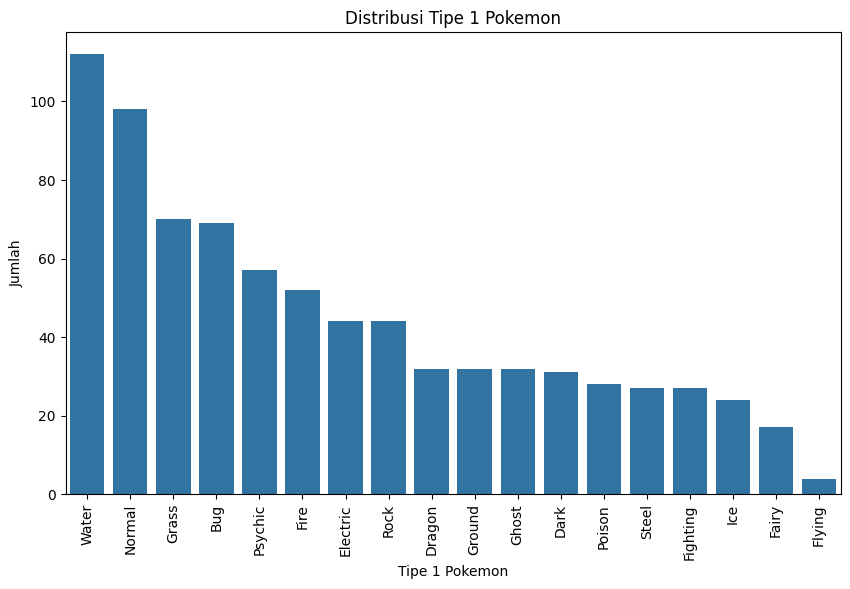

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type 1', order=df['Type 1'].value_counts().index)
plt.title('Distribusi Tipe 1 Pokemon')
plt.xlabel('Tipe 1 Pokemon')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

Tipe Water muncul sebagai tipe Pokemon yang paling umum. Hal ini menunjukkan bahwa banyak Pokemon yang memiliki afinitas terhadap elemen air. Di sisi lain, tipe Flying dan Fairy terlihat relatif jarang. Hal ini mencerminkan kelangkaan tipe tersebut dalam dunia Pokemon. Keberagaman distribusi ini memberikan gambaran tentang keseimbangan yang diupayakan dalam desain permainan, di mana beberapa tipe lebih sering ditemui sementara yang lain lebih unik dan langka. Pola ini juga dapat memberikan wawasan tentang strategi permainan, di mana pemain mungkin perlu mempertimbangkan frekuensi dan kekuatan relatif dari setiap tipe Pokemon saat merancang tim.

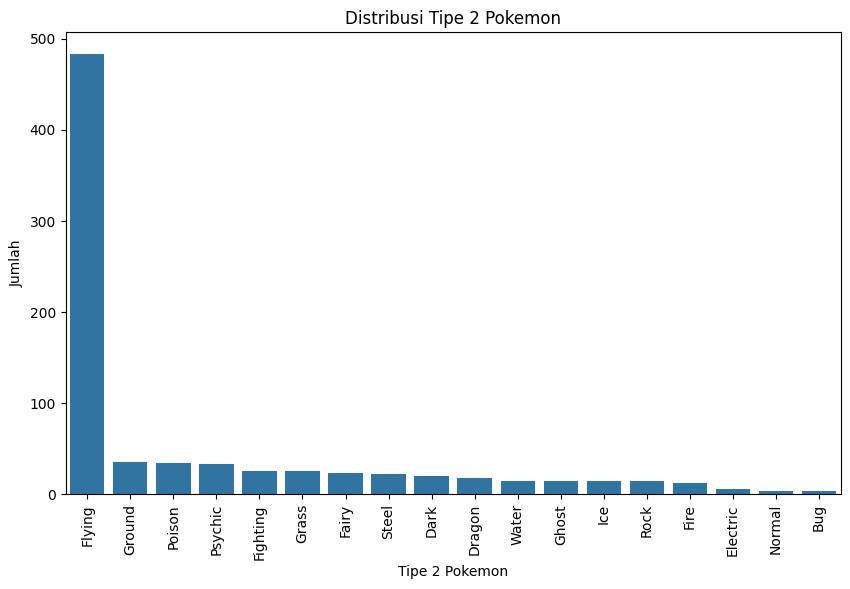

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type 2', order=df['Type 2'].value_counts().index)
plt.title('Distribusi Tipe 2 Pokemon')
plt.xlabel('Tipe 2 Pokemon')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

Tipe Flying tampak sebagai tipe sekunder yang paling umum. Tipe ini sering kali berpasangan dengan berbagai tipe utama, seperti Normal dan Bug. Tipe Flying menunjukkan kecenderungan desain untuk memberikan kemampuan terbang kepada banyak Pokemon. Sebaliknya, tipe seperti Bug dan Normal muncul lebih jarang sebagai tipe sekunder. Hal ini  menunjukkan bahwa kombinasi ini mungkin lebih khusus dan dirancang untuk memberikan keunggulan strategis tertentu. Keberadaan tipe sekunder memberikan dimensi tambahan pada karakteristik dan kemampuan Pokemon. Selain itu, keberadaan tipe sekunder dapat memperkaya strategi dalam pertempuran dan diversifikasi dalam permainan. Distribusi ini mencerminkan tipe sekunder yang digunakan untuk memperkuat atau menyeimbangkan kelemahan tipe utama, menciptakan Pokemon yang lebih serbaguna, dan menantang dalam pertempuran.

## Konversi atribut "Name" menjadi numerik

In [ ]:
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

## Label encoding untuk atribut "Type 1" dan "Type 2"

In [ ]:
df['Type 1'] = le.fit_transform(df['Type 1'])
df['Type 2'] = le.fit_transform(df['Type 2'])

## Statistik deskriptif berdasarkan tipe 1

In [ ]:
type_stats = df.groupby('Type 1').mean()
type_stats

,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,
0,457.231884,9.521739,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
1,465.967742,7.645161,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
2,347.656250,8.468750,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
3,419.090909,8.022727,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
4,446.882353,7.000000,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
5,437.444444,8.222222,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
6,344.134615,7.788462,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
7,598.000000,4.500000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
8,343.937500,7.781250,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


# Statistik deskriptif berdasarkan tipe 2

In [ ]:
type_stats2 = df.groupby('Type 2').mean()
type_stats2

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,,
0,229.333333,14.333333,393.333333,53.333333,90.000000,80.000000,46.666667,61.666667,61.666667,3.333333,0.000000
1,446.750000,12.750000,484.400000,75.550000,109.800000,72.050000,81.800000,69.850000,75.350000,3.750000,0.050000
2,392.444444,9.111111,526.166667,82.166667,94.444444,87.055556,98.500000,83.444444,80.555556,4.166667,0.222222
3,420.333333,7.666667,455.333333,88.166667,72.666667,68.333333,81.166667,73.500000,71.500000,4.000000,0.166667
4,303.000000,12.782609,417.956522,64.304348,61.608696,73.869565,75.000000,81.956522,61.217391,3.565217,0.086957
5,351.961538,9.423077,525.846154,79.461538,112.846154,82.500000,81.269231,82.384615,87.384615,3.923077,0.153846
6,426.416667,4.666667,506.250000,71.250000,81.250000,80.166667,110.416667,83.500000,79.666667,4.000000,0.250000
7,403.838509,9.507246,420.155280,68.494824,75.683230,67.730849,69.759834,68.623188,69.863354,3.198758,0.078675
8,320.714286,10.571429,430.714286,59.142857,84.142857,82.285714,73.214286,78.071429,53.857143,4.785714,0.071429


# Visualisasi statistik

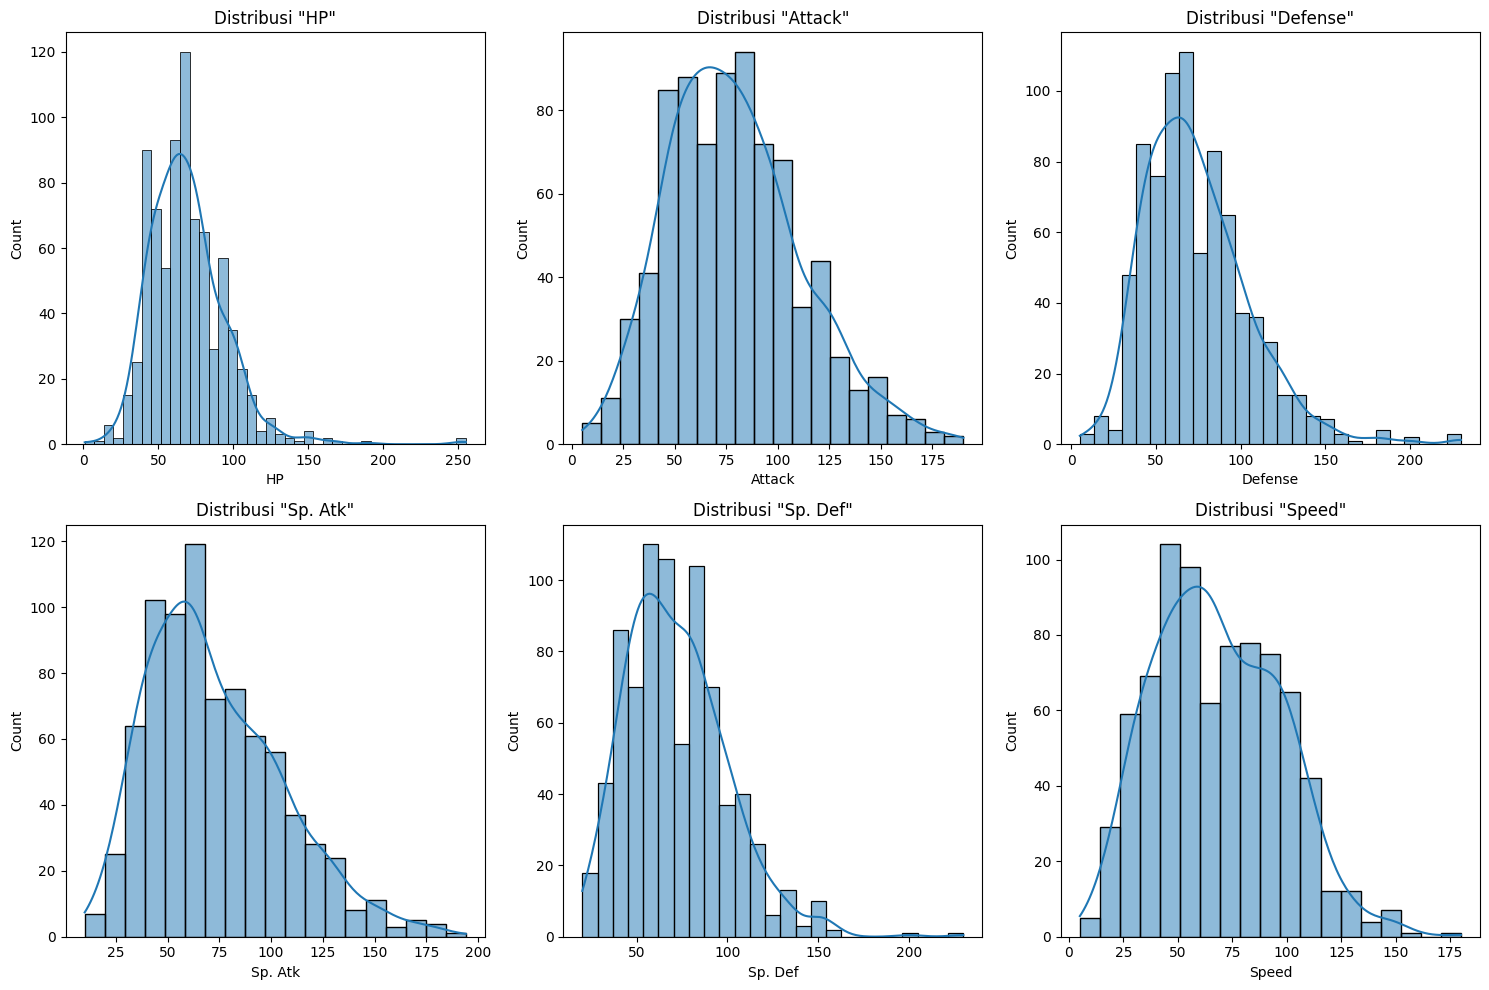

In [ ]:
plt.figure(figsize=(15, 10))
for i, stat in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[stat], kde=True)
    plt.title(f'Distribusi "{stat}"')
plt.tight_layout()
plt.show()


 Atribut 'Attack' menunjukkan distribusi yang cukup merata dengan sedikit puncak di nilai menengah. Hal ini mencerminkan bahwa sebagian besar Pokemon memiliki kekuatan serangan fisik yang cukup seimbang. Atribut 'HP' dan 'Defense' memperlihatkan distribusi yang mirip, dengan sebagian besar Pokemon memiliki nilai kesehatan dan pertahanan yang berada pada kisaran menengah hingga rendah. Hal ini menunjukkan bahwa kebanyakan Pokemon tidak memiliki keunggulan signifikan dalam kedua atribut ini. Atribut 'Speed' menampilkan distribusi yang lebih cenderung normal dengan kecenderungan ke nilai menengah, tetapi juga terdapat beberapa Pokemon yang memiliki kecepatan sangat tinggi,sehingga berpotensi menjadi faktor penentu dalam pertempuran. Atribut 'Attack' dan 'Sp. Atk' menunjukkan distribusi yang hampir serupa, di mana mayoritas Pokemon memiliki kekuatan serangan fisik dan serangan khusus di kisaran menengah. Namun, terdapat beberapa outlier dengan nilai serangan yang sangat tinggi. Hal ini mengindikasikan bahwa Pokemon tersebut memiliki potensi serangan yang luar biasa dan dapat menjadi ancaman signifikan dalam pertempuran. Atribut 'Defense' dan 'Sp. Def' juga menunjukkan distribusi yang hampir serupa, di mana sebagian besar Pokemon memiliki pertahanan fisik dan pertahanan khusus di kisaran menengah. Namun, terdapat beberapa outlier dengan nilai pertahanan yang sangat tinggi. Hal ini menunjukkan bahwa adanya Pokemon yang sangat unggul dalam aspek pertahanan dan mampu menahan serangan dengan lebih efektif.



# Hubungan antara atribut

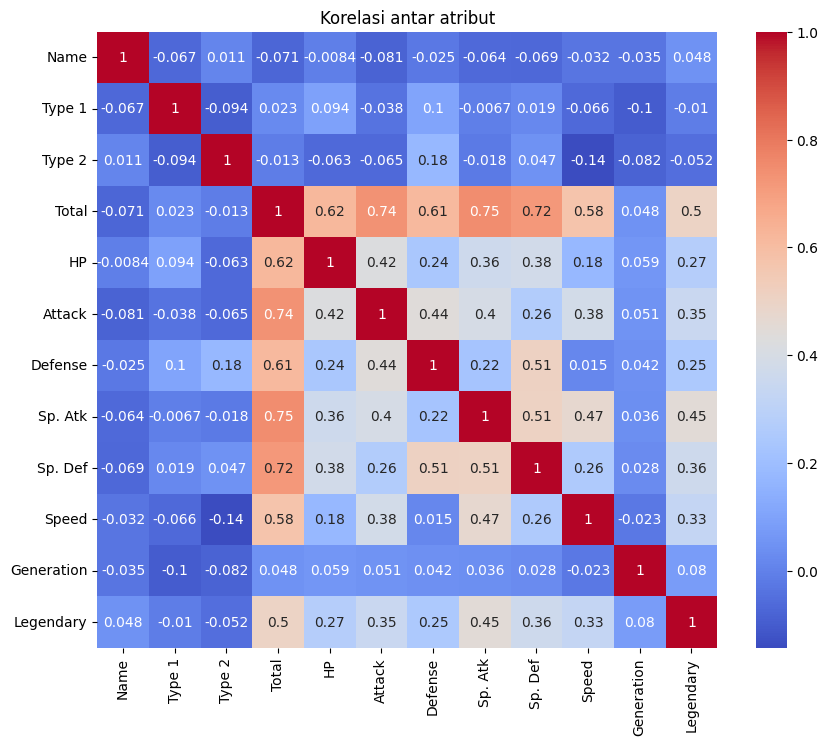

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar atribut')
plt.show()

Terdapat korelasi positif yang cukup kuat antara 'Attack' dan 'Sp. Atk' sebesar 0.4. Hal ini menunjukkan bahwa Pokemon dengan serangan fisik yang tinggi cenderung juga memiliki serangan khusus yang tinggi. Korelasi ini mengindikasikan bahwa beberapa Pokemon dirancang untuk menjadi penyerang yang serba bisa. Di sisi lain, korelasi antara 'Defense' dan 'Sp. Def' senilai 0.51 mencerminkan bahwa Pokemon dengan pertahanan fisik yang baik sering kali juga memiliki pertahanan khusus yang kuat, sehingga membuat Pokemon lebih tahan terhadap berbagai jenis serangan.

# Analisis Pokemon Legendaris vs. Non-Legendaris


In [ ]:
legendary_stats = df.groupby('Legendary').mean()
legendary_stats

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,,,,
0,396.232653,9.484354,7.978231,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
1,436.446154,9.276923,7.353846,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


# Visualisasi perbandingan

<Figure size 1200x600 with 0 Axes>

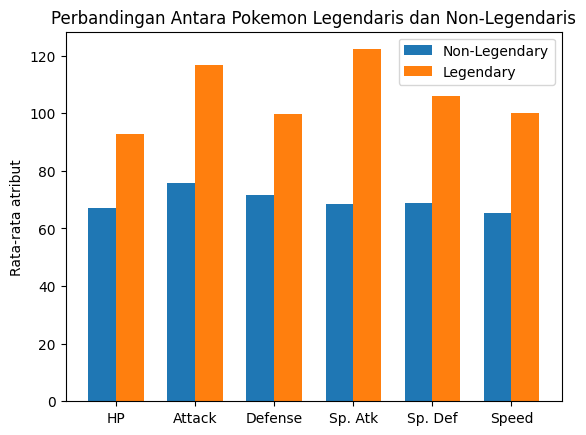

In [ ]:
plt.figure(figsize=(12, 6))
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
legendary_mean = df[df['Legendary'] == 1][stats].mean()
non_legendary_mean = df[df['Legendary'] == 0][stats].mean()
x = np.arange(len(stats))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, non_legendary_mean, width, label='Non-Legendary')
ax.bar(x + width/2, legendary_mean, width, label='Legendary')

ax.set_ylabel('Rata-rata atribut')
ax.set_title('Perbandingan Antara Pokemon Legendaris dan Non-Legendaris')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()

Pokemon legendaris memiliki rata-rata nilai yang lebih tinggi di semua atribut dibandingkan dengan Pokemon non-legendaris. Rata-rata 'HP' Pokemon legendaris lebih tinggi menunjukkan bahwa Pokemon dapat menahan lebih banyak kerusakan dalam pertempuran. Atribut 'Attack' dan 'Sp. Atk' juga menunjukkan keunggulan yang signifikan bagi Pokemon legendaris. Hal ini mengindikasikan bahwa Pokemon memiliki potensi serangan fisik dan khusus yang jauh lebih kuat. Demikian pula, atribut 'Defense' dan 'Sp. Def' memiliki rata-rata lebih tinggi pada Pokemon legendaris membuat Pokemon tersebut lebih tahan terhadap serangan fisik maupun khusus. Kecepatan ('Speed') Pokemon legendaris juga memiliki rata-rata lebih tinggi yang dapat memberikan keunggulan dalam menyerang terlebih dahulu saat pertempuran. Pokemon legendaris umumnya dirancang untuk menjadi lebih kuat dan serbaguna dibandingkan dengan Pokemon non-legendaris, sehingga dapat memberikan peran yang lebih dominan dalam strategi permainan.